# ILIYAS ANSARI (22MCA1079)

# Ex No. 03

# 

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
# Define the dataset
data = pd.DataFrame({
    'Age Group': ['Old', 'Middle', 'Middle', 'Young', 'Middle', 'Young', 'Young', 'Old', 'Old', 'Middle'],
    'Certified': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No'],
    'Skill Type': ['Soft Skill', 'Hard Skill', 'Soft Skill', 'Hard Skill', 'Hard Skill', 'Soft Skill',
                   'Soft Skill', 'Soft Skill', 'Hard Skill', 'Soft Skill'],
    'Status': ['Rejected', 'Selected', 'Rejected', 'Selected', 'Rejected', 'Selected', 'Selected',
               'Rejected', 'Rejected', 'Selected']
})

print(data)


  Age Group Certified  Skill Type    Status
0       Old       Yes  Soft Skill  Rejected
1    Middle        No  Hard Skill  Selected
2    Middle       Yes  Soft Skill  Rejected
3     Young        No  Hard Skill  Selected
4    Middle       Yes  Hard Skill  Rejected
5     Young        No  Soft Skill  Selected
6     Young       Yes  Soft Skill  Selected
7       Old        No  Soft Skill  Rejected
8       Old        No  Hard Skill  Rejected
9    Middle        No  Soft Skill  Selected


## 1. Consider the following dataset and calculate the entropy and information gain w.r.t the target attribute named “Status”.

In [3]:
# Calculate the entropy of the target attribute "Status"
status_counts = data['Status'].value_counts()
num_instances = len(data)
entropy_status = 0
for count in status_counts:
    probability = count / num_instances
    entropy_status += -probability * math.log2(probability)
print(f"Entropy of Status: {entropy_status:.3f}")

# Calculate the information gain of each attribute w.r.t. the "Status" attribute
for attribute in ['Age Group', 'Certified', 'Skill Type']:
    entropy_attribute = 0
    attribute_value_counts = data[attribute].value_counts()
    for value, count in attribute_value_counts.items():
        value_subset = data[data[attribute] == value]
        value_subset_size = len(value_subset)
        value_status_counts = value_subset['Status'].value_counts()
        value_entropy_status = 0
        for value_count in value_status_counts:
            value_probability = value_count / value_subset_size
            value_entropy_status += -value_probability * math.log2(value_probability)
        entropy_attribute += count / num_instances * value_entropy_status
    information_gain = entropy_status - entropy_attribute
    print(f"Information gain of {attribute}: {information_gain:.3f}")


Entropy of Status: 1.000
Information gain of Age Group: 0.600
Information gain of Certified: 0.125
Information gain of Skill Type: 0.000


## 2. From the above calculated values of gain, design a decision tree for the above given data set.

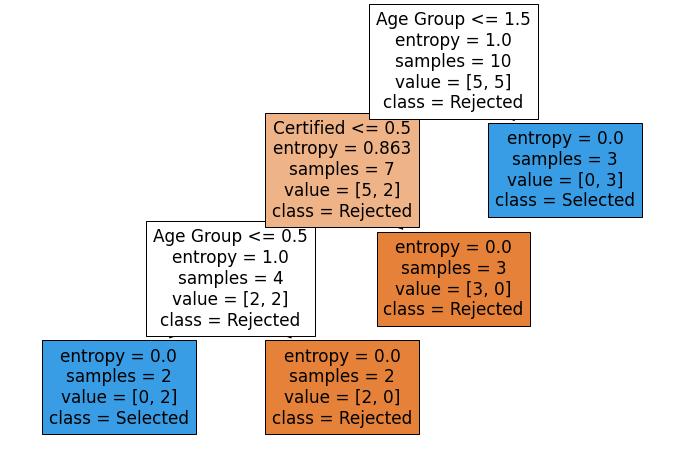

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.DataFrame({
    'Age Group': ['Old', 'Middle', 'Middle', 'Young', 'Middle', 'Young', 'Young', 'Old', 'Old', 'Middle'],
    'Certified': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No'],
    'Skill Type': ['Soft Skill', 'Hard Skill', 'Soft Skill', 'Hard Skill', 'Hard Skill', 'Soft Skill',
                   'Soft Skill', 'Soft Skill', 'Hard Skill', 'Soft Skill'],
    'Status': ['Rejected', 'Selected', 'Rejected', 'Selected', 'Rejected', 'Selected', 'Selected',
               'Rejected', 'Rejected', 'Selected']
})

# Encode categorical variables
le = LabelEncoder()
data['Age Group'] = le.fit_transform(data['Age Group'])
data['Certified'] = le.fit_transform(data['Certified'])
data['Skill Type'] = le.fit_transform(data['Skill Type'])
data['Status'] = le.fit_transform(data['Status'])

# Build a decision tree classifier using information gain
dt = DecisionTreeClassifier(criterion='entropy')
X = data.drop('Status', axis=1)
y = data['Status']
dt.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Rejected', 'Selected'], filled=True)
plt.show()


## 3. Transform the designed decision tree into decision rules.

In [5]:
# Transform the decision tree into decision rules
def tree_to_rules(tree, feature_names):
    rules = []
    for feature in feature_names:
        for value in np.unique(data[feature]):
            threshold = np.mean(data[data[feature] == value]['Status'])
            rule = f"{feature} == {value} => Status = {'Selected' if threshold > 0.5 else 'Rejected'}"
            rules.append(rule)
    return rules

# Print the decision rules
rules = tree_to_rules(dt, data.columns[:-1])
for rule in rules:
    print(rule)


Age Group == 0 => Status = Rejected
Age Group == 1 => Status = Rejected
Age Group == 2 => Status = Selected
Certified == 0 => Status = Selected
Certified == 1 => Status = Rejected
Skill Type == 0 => Status = Rejected
Skill Type == 1 => Status = Rejected


## 4. Use the designed decision tree or rules to predict the ‘Status’ of the given 
employee.
▪ Young No Hard Skill
▪ Old Yes Soft Skill
▪ Middle Yes Hard Skill

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
data = pd.DataFrame({
    'Age Group': ['Old', 'Middle', 'Middle', 'Young', 'Middle', 'Young', 'Young', 'Old', 'Old', 'Middle'],
    'Certified': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No'],
    'Skill Type': ['Soft Skill', 'Hard Skill', 'Soft Skill', 'Hard Skill', 'Hard Skill', 'Soft Skill', 'Soft Skill',
                   'Soft Skill', 'Hard Skill', 'Soft Skill'],
    'Status': ['Rejected', 'Selected', 'Rejected', 'Selected', 'Rejected', 'Selected', 'Selected', 'Rejected',
               'Rejected', 'Selected']
})

# Encode categorical variables
le = LabelEncoder()
data['Age Group'] = le.fit_transform(data['Age Group'])
data['Certified'] = le.fit_transform(data['Certified'])
data['Skill Type'] = le.fit_transform(data['Skill Type'])
data['Status'] = le.fit_transform(data['Status'])

# Build a decision tree classifier using information gain
dt = DecisionTreeClassifier(criterion='entropy')
X = data.drop('Status', axis=1)
y = data['Status']
dt.fit(X, y)

# Export the decision tree as text rules
tree_rules = export_text(dt, feature_names=X.columns.tolist())

# Print the decision rules
print(tree_rules)


|--- Age Group <= 1.50
|   |--- Certified <= 0.50
|   |   |--- Age Group <= 0.50
|   |   |   |--- class: 1
|   |   |--- Age Group >  0.50
|   |   |   |--- class: 0
|   |--- Certified >  0.50
|   |   |--- class: 0
|--- Age Group >  1.50
|   |--- class: 1



## 5. Design a function named find_entropy in python for finding the entropy of the attributes given in the above dataset.

In [7]:
import pandas as pd
import math

# Load the dataset
data = pd.DataFrame({
    'Age Group': ['Old', 'Middle', 'Middle', 'Young', 'Middle', 'Young', 'Young', 'Old', 'Old', 'Middle'],
    'Certified': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No'],
    'Skill Type': ['Soft Skill', 'Hard Skill', 'Soft Skill', 'Hard Skill', 'Hard Skill', 'Soft Skill',
                   'Soft Skill', 'Soft Skill', 'Hard Skill', 'Soft Skill'],
    'Status': ['Rejected', 'Selected', 'Rejected', 'Selected', 'Rejected', 'Selected', 'Selected',
               'Rejected', 'Rejected', 'Selected']
})

def find_entropy(df, attribute):
    """
    Calculate the entropy of a given attribute in a pandas DataFrame.
    
    Args:
    - df: pandas DataFrame
    - attribute: string, the name of the attribute column to calculate entropy for
    
    Returns:
    - entropy: float, the entropy value of the given attribute
    """
    # Count the number of occurrences of each value in the attribute column
    value_counts = df[attribute].value_counts()
    
    # Calculate the total number of instances in the DataFrame
    total_instances = len(df)
    
    # Initialize entropy to 0
    entropy = 0
    
    # Loop through the values and calculate the entropy
    for value_count in value_counts:
        probability = value_count / total_instances
        entropy -= probability * math.log2(probability)
    
    return entropy

# Example usage:
entropy = find_entropy(data, 'Age Group')
print(f"Entropy of 'Age Group': {entropy}")


Entropy of 'Age Group': 1.5709505944546684


## 6. Design a function named find_gain in python for finding the information gain of the attributes given in the above dataset w.r.t to the ‘Status’ attribute

In [8]:
import math

def find_entropy(df):
    '''
    Find entropy of the given dataset.
    
    Parameters:
    df (pandas.DataFrame): input dataset.
    
    Returns:
    float: entropy of the dataset.
    '''
    entropy = 0
    num_records = len(df)
    classes = df['Status'].unique()
    for c in classes:
        num_c = len(df[df['Status']==c])
        p = num_c/num_records
        entropy -= p * math.log2(p)
    return entropy

def find_gain(df, attribute):
    '''
    Find information gain of the given attribute w.r.t. the 'Status' attribute.
    
    Parameters:
    df (pandas.DataFrame): input dataset.
    attribute (str): name of the attribute to calculate information gain for.
    
    Returns:
    float: information gain of the attribute.
    '''
    total_entropy = find_entropy(df)
    values = df[attribute].unique()
    entropy = 0
    for v in values:
        num_v = len(df[df[attribute]==v])
        df_v = df[df[attribute]==v]
        entropy += (num_v/len(df))*find_entropy(df_v)
    gain = total_entropy - entropy
    return gain
find_entropy(data)
find_gain(data, 'Status')

1.0

## 7. Load the above dataset as data frame in python

In [9]:
import pandas as pd

data = pd.DataFrame({
    'Age Group': ['Old', 'Middle', 'Middle', 'Young', 'Middle', 'Young', 'Young', 'Old', 'Old', 'Middle'],
    'Certified': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No'],
    'Skill Type': ['Soft Skill', 'Hard Skill', 'Soft Skill', 'Hard Skill', 'Hard Skill', 'Soft Skill', 'Soft Skill', 'Soft Skill', 'Hard Skill', 'Soft Skill'],
    'Status': ['Rejected', 'Selected', 'Rejected', 'Selected', 'Rejected', 'Selected', 'Selected', 'Rejected', 'Rejected', 'Selected']
})

## 8. Design and visualize the decision tree using scikit learn package for the  given dataset.

[Text(620.0, 792.75, 'Age Group <= 1.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = Not Selected'),
 Text(465.0, 566.25, 'Certified <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = Not Selected'),
 Text(310.0, 339.75, 'Age Group <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = Not Selected'),
 Text(155.0, 113.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Selected'),
 Text(465.0, 113.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Not Selected'),
 Text(620.0, 339.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Not Selected'),
 Text(775.0, 566.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Selected')]

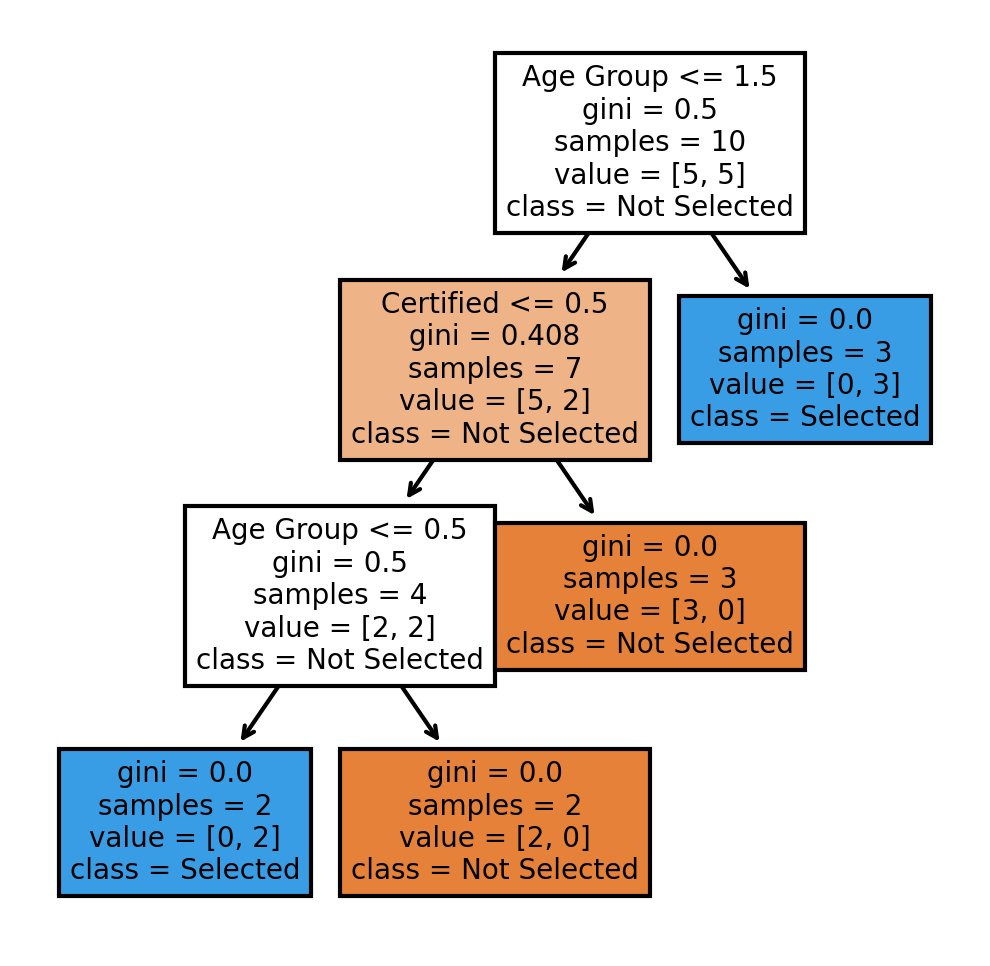

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# create decision tree model
model = DecisionTreeClassifier()

# fit model with data
model.fit(X, y)

# plot decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(model, feature_names=X.columns, class_names=['Not Selected', 'Selected'], filled=True)


## 9. Design and visualize the decision tree using scikit-learn package for the Irish(training) dataset from Kaggle.

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

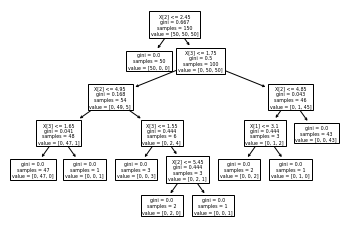

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Load Iris dataset
iris = load_iris()

# Create a pandas DataFrame from the dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column to the DataFrame
iris_df['target'] = iris.target

# Create feature matrix X and target vector y
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

# Create a decision tree classifier object
tree = DecisionTreeClassifier()

# Fit the classifier to the data
tree.fit(X, y)

# Visualize the decision tree
plot_tree(tree)


## 10.Evaluate the designed model on the Irish dataset itself with various metrics.

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the Irish dataset
df = pd.read_csv('C:/Users/ilyas/Desktop/Jupitor/Machine Learning/iris.csv')


# Split the dataset into features (X) and target (y)
X = df.drop(['species'], axis=1)
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict the test set
y_pred = tree.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
